<a href="https://colab.research.google.com/github/ayush100497/Projects/blob/main/Hotel%20booking%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Before starting our analysis the first question thats comes in my mind is,
# What is Exploratory Data Analysis?

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

Basically it is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

To start with, I have imported necessary libraries (for this analysis **pandas, numpy, matplotlib**) and loaded the data set "Hotel Bookings.csv" by mounting my Google drive and using "read_csv" command in pandas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Team capstone project/Hotel Bookings.csv")
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

After mounting google drive we will start by rmoving duplicate rows and Nan values.

In [ ]:
# Droping duplicate values:
duplicate_rows = hotel_df[hotel_df.duplicated()]
print(duplicate_rows.shape) 

hotel_df = hotel_df.drop_duplicates()
hotel_df.shape

(31994, 32)


(87396, 32)

In [ ]:
# Finding features/columns with Nan values 
# features_with_null_values
hotel_df.drop(columns= ["agent", "company"], inplace= True)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
# check for missing values
hotel_df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [ ]:
# Droping NaN values 
hotel_df = hotel_df.dropna()
hotel_df.shape

(86940, 30)

We will find out the unique values of every column, it will make it easier to select the the columns for plots and also give us an idea of the type of most suitable visualization. We can also use methods like groupby based upon this data. Example if the a column has less unique values there are more chances to group the particular data by that column and it will also look attractive. 

In [ ]:
#unique values
hotel_df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86940 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86940 non-null  object 
 1   is_canceled                     86940 non-null  int64  
 2   lead_time                       86940 non-null  int64  
 3   arrival_date_year               86940 non-null  int64  
 4   arrival_date_month              86940 non-null  object 
 5   arrival_date_week_number        86940 non-null  int64  
 6   arrival_date_day_of_month       86940 non-null  int64  
 7   stays_in_weekend_nights         86940 non-null  int64  
 8   stays_in_week_nights            86940 non-null  int64  
 9   adults                          86940 non-null  int64  
 10  children                        86940 non-null  float64
 11  babies                          86940 non-null  int64  
 12  meal                           

In [ ]:
hotel_df['customer_type'].unique()
#calculating total nights as a sum of weekday and weekend nights
hotel_df["total_nights"] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
hotel_df['new_days_in_waiting_list'] = hotel_df['days_in_waiting_list'].mean()
# hotel_df['month_no.'] = hotel_df['arrival_date_month'].replace(["January" , "A January"],['February' , "B February"],[ 'March' , "C March"],[ 'April' , "D April",'May' , "E May"],['June' , 'F June'],['July' , 'G July'],['August' , 'H August'],['September' , 'I September'],['October' , 'J October'],['November' , 'K November'],['December' , "L December"])
hotel_df['month_number'] = hotel_df['arrival_date_month'].replace({ "January" : "A January", 'February' : "B February", 'March' : "C March", 'April' : "D April",'May' : "E May",'June' : 'F June','July' : 'G July','August' : 'H August','September' : 'I September','October' : 'J October','November' : 'K November','December' : "L December"},inplace = True)
hotel_df['year_month'] = hotel_df['arrival_date_year'].astype(str) + " " + hotel_df['arrival_date_month'].astype(str)
hotel_df.sort_values("year_month", axis = 0, ascending = True, inplace = True)

# hotel_df['month_no.'] = hotel_df['arrival_date_month'].replace({ "January" : "A January", 'February' : "B February", 'March' : "C March", 'April' : "D April",'May' : "E May",'June' : 'F June','July' : 'G July','August' : 'H August','September' : 'I September','October' : 'J October','November' : 'K November','December' : "L December"},inplace = True)
# hotel_df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
hotel_df['new_days_in_waiting_list'].value_counts()

0.753497    86940
Name: new_days_in_waiting_list, dtype: int64

In [ ]:
#repeated guests
rep_guest = hotel_df[hotel_df['is_repeated_guest'] == 1]
#Cancelled and non cancelled
hotels_not_cancelled = hotel_df[hotel_df['is_canceled'] == 0]
hotels_cancelled = hotel_df[hotel_df['is_canceled'] == 1]


1) What is the percentage of repeating customers?

,Hotels,Guests_arriving,Repeated_guests,Repitition%
0,City Hotel,37377,1708,5.0
1,Resort Hotel,25576,1703,7.0


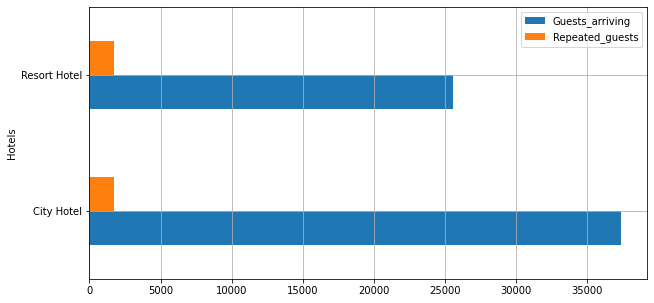

In [ ]:
#Total number of repeated guests grouped by hotel type
customer_count = rep_guest['hotel'].value_counts().reset_index()
#Total number of arrivals grouped by hotel type
guests_coming = hotels_not_cancelled['hotel'].value_counts().reset_index()
#assigning column values
guests_coming.columns = ['Hotels','Guests_arriving']
#Concat two dataframes
guests_coming = pd.concat([guests_coming,customer_count],axis =1)
#removing the duplicate column
guests_coming.pop('index')
guests_coming.columns = ['Hotels','Guests_arriving','Repeated_guests']
#calculating repitition percentage
guests_coming['Repitition%'] = round(guests_coming['Repeated_guests']/guests_coming['Guests_arriving']*100)
guests_coming
#plotting the repeated guest and total guests together
guests_coming.plot(x='Hotels', y=['Guests_arriving', 'Repeated_guests'], figsize=(10,5), grid=True, kind ='barh')
guests_coming

**Conclusion :** We have an equal average of repeating customers visiting city hotel and resort hotel. This shows the regular visitors who prefer their stays in the particular hotel. Both of them have an almost equal repition rate - 1708 for city hotel that is 5% and 1703 for resort hotel taht is 7%.

In [ ]:
# hotel_df[hotel_df['stays_in_weekend_nights'] > 1]

Customers are more likely to wait in August in 2016 before the booking is confirmed
year_month
2015 G July            0
2015 H August          0
2015 I September    1489
2015 J October      3472
2015 K November     2585
2015 L December     3614
2016 A January      3265
2016 B February        0
2016 C March          58
2016 D April        4442
2016 E May          6156
2016 F June         1718
2016 G July          534
2016 H August       2009
2016 I September    5780
2016 J October      5196
2016 K November      149
2016 L December      596
2017 A January       229
2017 B February      738
2017 C March        1737
2017 D April        1257
2017 E May           639
2017 F June           59
2017 G July           34
2017 H August          0
Name: days_in_waiting_list, dtype: int64


2017 E May          3074
2016 J October      3007
2016 H August       2973
2017 G July         2936
2016 C March        2911
2016 E May          2827
2017 F June         2805
2017 H August       2771
2016 I September    2764
2016 G July         2747
2016 D April        2734
2017 D April        2733
2017 C March        2719
2016 F June         2595
2016 K November     2499
2017 B February     2383
2015 I September    2259
2016 B February     2246
2015 J October      2239
2016 L December     2119
2017 A January      2086
2015 H August       1870
2015 L December     1590
2016 A January      1515
2015 K November     1402
2015 G July         1149
Name: year_month, dtype: int64

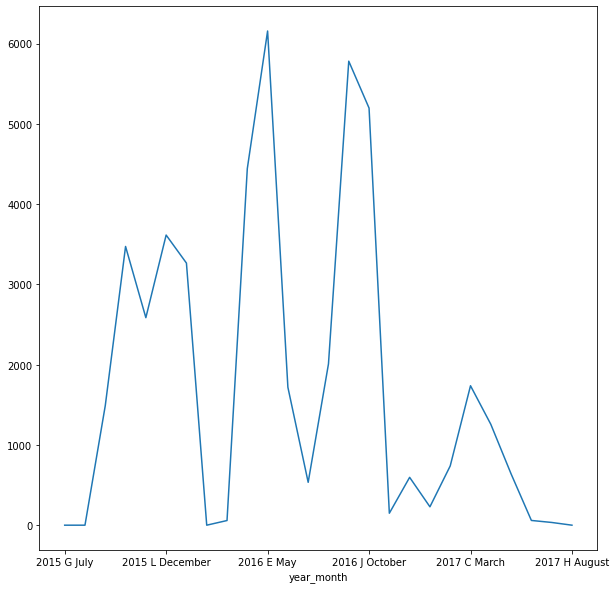

In [ ]:
#Average waiting days per month per year
hotels_not_cancelled.groupby('year_month')['days_in_waiting_list'].mean().sort_values(ascending = False)
print('Customers are more likely to wait in August in 2016 before the booking is confirmed')
hotels_not_cancelled.groupby('year_month')['days_in_waiting_list'].sum().plot(kind='line', figsize = (10,10))
print(round(hotels_not_cancelled.groupby('year_month')['days_in_waiting_list'].sum()))
hotels_not_cancelled['year_month'].value_counts()


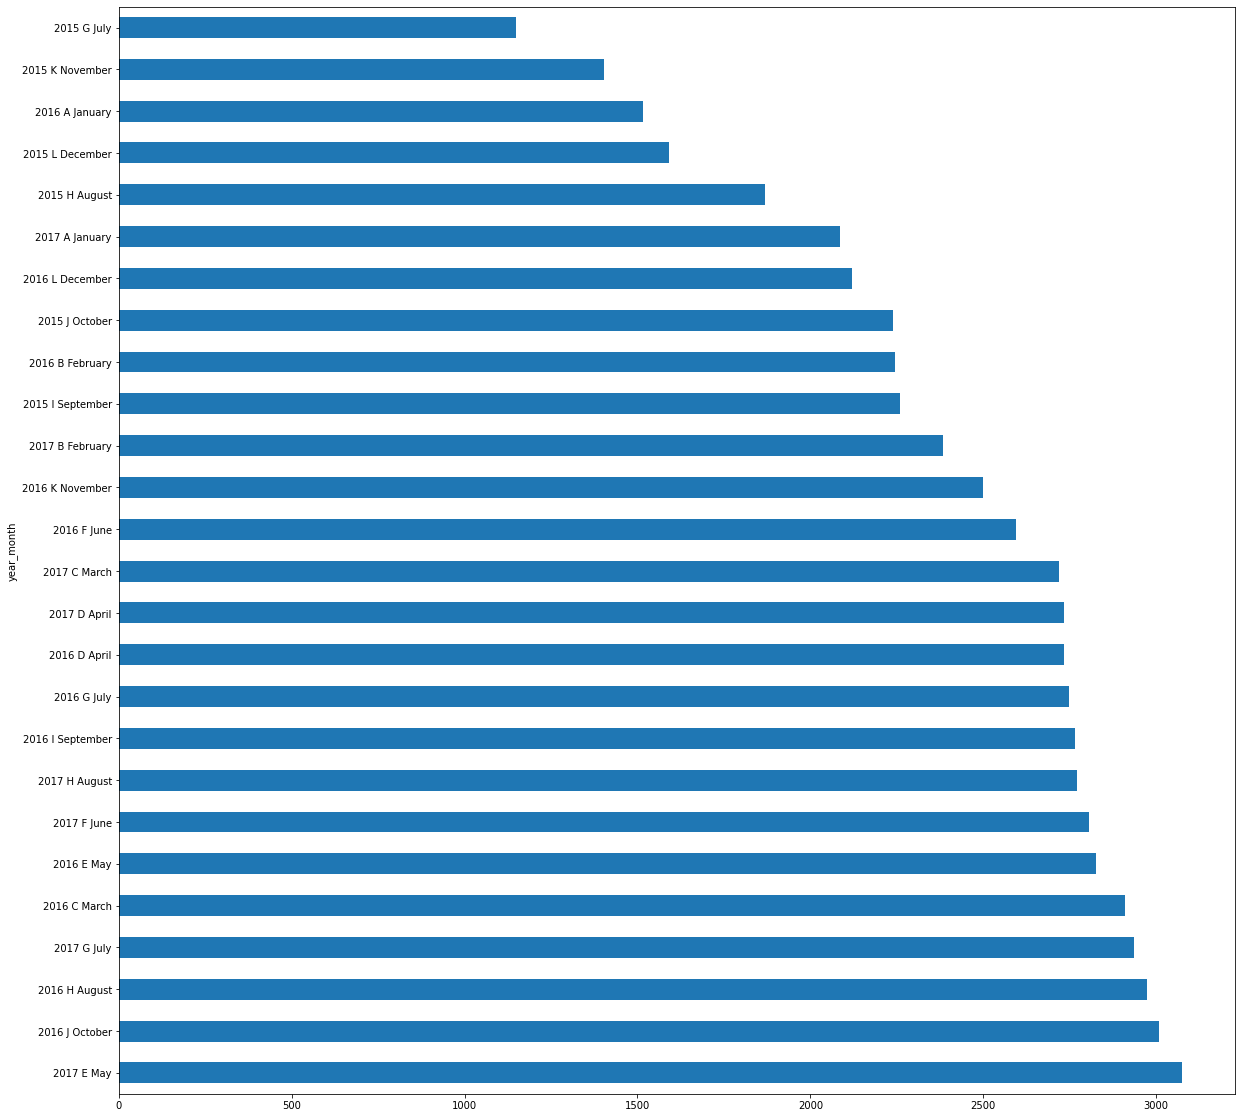

In [ ]:
#Total arrivals per month per year
hotels_not_cancelled.groupby('year_month')['is_canceled'].count().sort_values(ascending = False).plot(kind='barh', figsize =(20,20))

In [ ]:
#concatenation of two data frames containing sum of arrivals and average of waiting time per month.
new_hotels_df = hotels_not_cancelled['year_month'].value_counts().reset_index()
new_hotels_df.sort_values("index", axis = 0, ascending = True, inplace = True)
new_hotels_df.rename(columns = {'year_month' : 'Arrivals','index':'year_month'}, inplace = True)
arrival = new_hotels_df['Arrivals']
average_waiting = hotels_not_cancelled.groupby('year_month')['days_in_waiting_list'].sum().reset_index()
average_waiting.sort_values("year_month", axis = 0, ascending = True, inplace = True)
#adding merge command on year_month
avg_wait = pd.merge(average_waiting, new_hotels_df, on="year_month")
avg_wait['waitings days above and below average'] = avg_wait['days_in_waiting_list'] - avg_wait['days_in_waiting_list'].mean()
avg_wait.sort_values("waitings days above and below average", axis = 0, ascending = False, inplace = True)
avg_wait

,year_month,days_in_waiting_list,Arrivals,waitings days above and below average
10,2016 E May,6156,2827,4396.153846
14,2016 I September,5780,2764,4020.153846
15,2016 J October,5196,3007,3436.153846
9,2016 D April,4442,2734,2682.153846
5,2015 L December,3614,1590,1854.153846
3,2015 J October,3472,2239,1712.153846
6,2016 A January,3265,1515,1505.153846
4,2015 K November,2585,1402,825.153846
13,2016 H August,2009,2973,249.153846
20,2017 C March,1737,2719,-22.846154


3) Proportion of waiting days below and above average? **DOUBT**

In [ ]:
#concatenation of two data frames containing sum of arrivals and average of waiting time per month.
new_hotels_df = hotels_not_cancelled['year_month'].value_counts().reset_index()
new_hotels_df.sort_values("index", axis = 0, ascending = True, inplace = True)
new_hotels_df.rename(columns = {'year_month' : 'Arrivals','index':'year_month'}, inplace = True)
arrival = new_hotels_df['Arrivals']
average_waiting = hotels_not_cancelled.groupby('year_month')['days_in_waiting_list'].sum().reset_index()
average_waiting.sort_values("year_month", axis = 0, ascending = True, inplace = True)

#adding merge command on year_month
avg_wait = pd.merge(average_waiting, new_hotels_df, on="year_month")
avg_wait['waitings days above and below average'] = avg_wait['days_in_waiting_list'] - avg_wait['days_in_waiting_list'].mean()
avg_wait.sort_values("waitings days above and below average", axis = 0, ascending = False, inplace = True)
avg_wait
#Creating difference of average waiting of of 2015
df_2015_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2015]
df_2015_arrivals_waiting_average = df_2015_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2015_arrivals['days_in_waiting_list'].sum()/6)
print('\n\n2015')
print(df_2015_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))
#Creating difference of average waiting of of 2016
df_2016_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2016]
df_2016_arrivals_waiting_average = df_2016_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2016_arrivals['days_in_waiting_list'].sum()/12)
print('2016')
print(df_2016_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))
#Creating difference of average waiting of of 2017
df_2017_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2017]
df_2017_arrivals_waiting_average = df_2017_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2017_arrivals['days_in_waiting_list'].sum()/8)
print('\n\n2017')
print(df_2017_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))



2015
  arrival_date_month  days_in_waiting_list
5         L December                1754.0
3          J October                1612.0
4         K November                 725.0
2        I September                -371.0
0             G July               -1860.0
1           H August               -1860.0
2016
   arrival_date_month  days_in_waiting_list
4               E May           3664.083333
8         I September           3288.083333
9           J October           2704.083333
3             D April           1950.083333
0           A January            773.083333
7            H August           -482.916667
5              F June           -773.916667
11         L December          -1895.916667
6              G July          -1957.916667
10         K November          -2342.916667
2             C March          -2433.916667
1          B February          -2491.916667


2017
  arrival_date_month  days_in_waiting_list
2            C March              1150.375
3            D April  

**Conclusion :** The above two graphs shows us that we have higher than approximate average waiting days in January, April, December, May, September, October and our higher arrivals are in august, july, may, march, april, june. Out of these months during season we need to focus on two months august and may, as we are having a higher waiting time and higher arrivals. We also have a higher standard deviation in Feb, and slightly lower arrivals but they should also be focused upon.

Highest bookings are by: 

  market_segment  total_nights  proportion_of_stay(in %)
0      Online TA        111739                 50.802924
1  Offline TA/TO         56067                 25.491257
2         Direct         30662                 13.940695
3         Groups         12734                  5.789603
4      Corporate          7032                  3.197148
5  Complementary          1040                  0.472843
6       Aviation           672                  0.305530


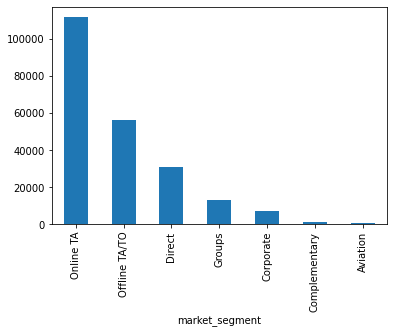

In [ ]:
# Here we will print the highest number of bookings by each market segment
import plotly.express as px
print('Highest bookings are by: \n')
high_bookings = hotels_not_cancelled.groupby('market_segment')['total_nights'].sum().sort_values(ascending = False).plot(kind ='bar' )
high_bookings_hotel_df = hotels_not_cancelled.groupby('market_segment')['total_nights'].sum().sort_values(ascending = False).reset_index()
high_bookings_hotel_df['total_nights']
high_bookings_hotel_df['proportion_of_stay(in %)'] = high_bookings_hotel_df['total_nights']/high_bookings_hotel_df['total_nights'].sum()*100
print(high_bookings_hotel_df)


**Conclusion:** Out of total, Online TA accounts the responsibility of more than 50% of the business due to their booking ratio after which we have OfflineTA/TO responsible for approximately 25% of the total hotel business. These two market segments seems to be the important aspect after which rest of the 25% of the ratio includes groups, corporates, aviationa and direct.

3) Proportion of waiting days below and above average? **DOUBT**

In [ ]:
#concatenation of two data frames containing sum of arrivals and average of waiting time per month.
new_hotels_df = hotels_not_cancelled['year_month'].value_counts().reset_index()
new_hotels_df.sort_values("index", axis = 0, ascending = True, inplace = True)
new_hotels_df.rename(columns = {'year_month' : 'Arrivals','index':'year_month'}, inplace = True)
arrival = new_hotels_df['Arrivals']
average_waiting = hotels_not_cancelled.groupby('year_month')['days_in_waiting_list'].sum().reset_index()
average_waiting.sort_values("year_month", axis = 0, ascending = True, inplace = True)

#adding merge command on year_month
avg_wait = pd.merge(average_waiting, new_hotels_df, on="year_month")
avg_wait['waitings days above and below average'] = avg_wait['days_in_waiting_list'] - avg_wait['days_in_waiting_list'].mean()
avg_wait.sort_values("waitings days above and below average", axis = 0, ascending = False, inplace = True)
avg_wait
#Creating difference of average waiting of of 2015
df_2015_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2015]
df_2015_arrivals_waiting_average = df_2015_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2015_arrivals['days_in_waiting_list'].sum()/6)
print('\n\n2015')
print(df_2015_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))
#Creating difference of average waiting of of 2016
df_2016_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2016]
df_2016_arrivals_waiting_average = df_2016_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2016_arrivals['days_in_waiting_list'].sum()/12)
print('2016')
print(df_2016_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))
#Creating difference of average waiting of of 2017
df_2017_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2017]
df_2017_arrivals_waiting_average = df_2017_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2017_arrivals['days_in_waiting_list'].sum()/8)
print('\n\n2017')
print(df_2017_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))



2015
  arrival_date_month  days_in_waiting_list
5         L December                1754.0
3          J October                1612.0
4         K November                 725.0
2        I September                -371.0
0             G July               -1860.0
1           H August               -1860.0
2016
   arrival_date_month  days_in_waiting_list
4               E May           3664.083333
8         I September           3288.083333
9           J October           2704.083333
3             D April           1950.083333
0           A January            773.083333
7            H August           -482.916667
5              F June           -773.916667
11         L December          -1895.916667
6              G July          -1957.916667
10         K November          -2342.916667
2             C March          -2433.916667
1          B February          -2491.916667


2017
  arrival_date_month  days_in_waiting_list
2            C March              1150.375
3            D April  

5) Which hotel has higher cancellation rate?

most likely the city hotel is to be cancelled
hotel
City Hotel      16041
Resort Hotel     7946
Name: is_canceled, dtype: int64


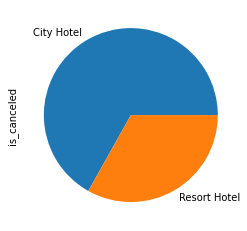

In [ ]:
#which hotel has higher cancellation rate
print('most likely the city hotel is to be cancelled')
hotels_cancelled = hotel_df[hotel_df['is_canceled'] == 1]
hotels_cancelled.groupby('hotel')['is_canceled'].count().plot(kind ='pie')
print(hotels_cancelled.groupby('hotel')['is_canceled'].count())

**Conclusion:** City hotels are most likely to be cancelled as compared to the resort hotels, there might be many reasons behind this like poeple changing their plans, having urgent work or they might be getting better deals in the same price.

In [ ]:
#cancellation rate by market segment
print('Customer are more likely to cancel: \n')
customer_cancel = hotels_cancelled.groupby('market_segment')['is_canceled'].count().reset_index()
print(customer_cancel)

Customer are more likely to cancel: 

  market_segment  is_canceled
0       Aviation           45
1  Complementary           86
2      Corporate          497
3         Direct         1723
4         Groups         1335
5  Offline TA/TO         2057
6      Online TA        18244


In [ ]:
#Waiting days per market segment
print('Least number of days in waiting list: \n')
least_waitlist = hotel_df.groupby('market_segment')['days_in_waiting_list'].sum().reset_index()
print(least_waitlist)
new_analysis = pd.concat([customer_cancel, least_waitlist], axis=1)
new_analysis.columns = ['market segment', 'cancellation', 'NA', 'waiting days']
new_analysis.drop(columns= ["NA"], inplace= True)
new_analysis

Least number of days in waiting list: 

  market_segment  days_in_waiting_list
0       Aviation                     0
1  Complementary                    39
2      Corporate                   539
3         Direct                   511
4         Groups                 33621
5  Offline TA/TO                 30670
6      Online TA                   129


,market segment,cancellation,waiting days
0,Aviation,45,0
1,Complementary,86,39
2,Corporate,497,539
3,Direct,1723,511
4,Groups,1335,33621
5,Offline TA/TO,2057,30670
6,Online TA,18244,129


**Conclusion :** As we had more bookings coming from Online TA and offline TA/TO, we can see that we have a highest cancellation rate in online TA and a very high waiting days in offline TA/TO. we need to work on solving this problem of cancellation and waiting list. Online TA accounts majority of bookings also, it also holds majority of cancellations.

3) Proportion of waiting days below and above average? **DOUBT**

In [ ]:
#concatenation of two data frames containing sum of arrivals and average of waiting time per month.
new_hotels_df = hotels_not_cancelled['year_month'].value_counts().reset_index()
new_hotels_df.sort_values("index", axis = 0, ascending = True, inplace = True)
new_hotels_df.rename(columns = {'year_month' : 'Arrivals','index':'year_month'}, inplace = True)
arrival = new_hotels_df['Arrivals']
average_waiting = hotels_not_cancelled.groupby('year_month')['days_in_waiting_list'].sum().reset_index()
average_waiting.sort_values("year_month", axis = 0, ascending = True, inplace = True)

#adding merge command on year_month
avg_wait = pd.merge(average_waiting, new_hotels_df, on="year_month")
avg_wait['waitings days above and below average'] = avg_wait['days_in_waiting_list'] - avg_wait['days_in_waiting_list'].mean()
avg_wait.sort_values("waitings days above and below average", axis = 0, ascending = False, inplace = True)
avg_wait
#Creating difference of average waiting of of 2015
df_2015_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2015]
df_2015_arrivals_waiting_average = df_2015_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2015_arrivals['days_in_waiting_list'].sum()/6)
print('\n\n2015')
print(df_2015_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))
#Creating difference of average waiting of of 2016
df_2016_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2016]
df_2016_arrivals_waiting_average = df_2016_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2016_arrivals['days_in_waiting_list'].sum()/12)
print('2016')
print(df_2016_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))
#Creating difference of average waiting of of 2017
df_2017_arrivals = hotels_not_cancelled[hotels_not_cancelled['arrival_date_year'] == 2017]
df_2017_arrivals_waiting_average = df_2017_arrivals.groupby('arrival_date_month')['days_in_waiting_list'].sum() - (df_2017_arrivals['days_in_waiting_list'].sum()/8)
print('\n\n2017')
print(df_2017_arrivals_waiting_average.reset_index().sort_values(by = 'days_in_waiting_list', ascending = False))



2015
  arrival_date_month  days_in_waiting_list
5         L December                1754.0
3          J October                1612.0
4         K November                 725.0
2        I September                -371.0
0             G July               -1860.0
1           H August               -1860.0
2016
   arrival_date_month  days_in_waiting_list
4               E May           3664.083333
8         I September           3288.083333
9           J October           2704.083333
3             D April           1950.083333
0           A January            773.083333
7            H August           -482.916667
5              F June           -773.916667
11         L December          -1895.916667
6              G July          -1957.916667
10         K November          -2342.916667
2             C March          -2433.916667
1          B February          -2491.916667


2017
  arrival_date_month  days_in_waiting_list
2            C March              1150.375
3            D April  

6) What is the cancellation percentage according to market segment?

In [ ]:
#creating two data frames booking nights and customer cancellations
highest_booking = hotels_not_cancelled.groupby('market_segment')['total_nights'].sum().sort_values(ascending = False)
cus = customer_cancel.reset_index()
high = highest_booking.reset_index()

,market_segment,total_nights,index,is_canceled,Cancel percentages
0,Online TA,111739,6,18244,16.327334
1,Offline TA/TO,56067,5,2057,3.668825
2,Direct,30662,3,1723,5.619333
3,Groups,12734,4,1335,10.483744
4,Corporate,7032,2,497,7.067691
5,Complementary,1040,1,86,8.269231
6,Aviation,672,0,45,6.696429


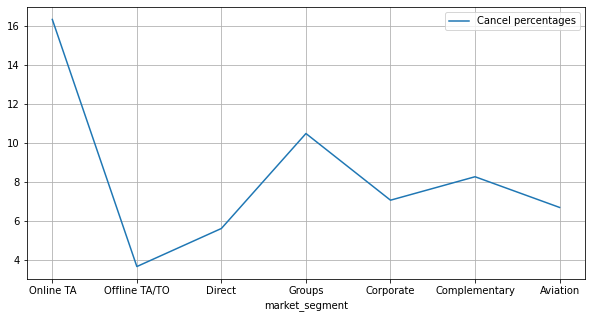

In [ ]:
# make line
# Merging two dataframes using outer join
highest_booking_merge = pd.merge(high, cus, on ='market_segment', how ='outer')
highest_booking_merge['Cancel percentages'] = highest_booking_merge['is_canceled']/highest_booking_merge['total_nights']*100
# print('According to me we should focus of groups and Online TA as they are having highest number of cancellation proprtations.')
highest_booking_merge.sort_values('Cancel percentages', ascending = False)
highest_booking_merge.plot(x='market_segment', y=['Cancel percentages'], figsize=(10,5), grid=True, kind ='line')
highest_booking_merge

**Conclusion :** According to me we should focus on groups and Online TA as they are having highest number of cancellation proprtations and out this online TA wsa also having highest bookings. So we need to see why customers are cancelling it and should try to take necessary steps to reduce cancellations. As Online TA accounts approx 23% of bookings cancelled and groups accounts approximately 14.4% of bookings cancelled.


In [ ]:
hotels_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,new_days_in_waiting_list,month_number,year_month
15269,Resort Hotel,1,144,2015,G July,27,3,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,0,Transient,123.00,0,1,Canceled,2015-06-30,2,0.753497,None,2015 G July
15268,Resort Hotel,1,183,2015,G July,28,6,2,5,1,0.0,0,HB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,0,Transient-Party,79.20,0,2,Canceled,2015-06-30,7,0.753497,None,2015 G July
15255,Resort Hotel,1,134,2015,G July,30,22,2,4,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,E,E,0,No Deposit,0,Transient,149.06,0,0,Canceled,2015-06-29,6,0.753497,None,2015 G July
15230,Resort Hotel,1,152,2015,G July,30,21,2,6,2,0.0,0,BB,PRT,Online TA,TA/TO,0,1,0,E,E,1,No Deposit,0,Transient,166.00,0,1,Canceled,2015-06-22,8,0.753497,None,2015 G July
15226,Resort Hotel,1,186,2015,G July,28,7,4,10,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,E,E,0,No Deposit,0,Contract,82.88,0,0,Canceled,2015-06-19,14,0.753497,None,2015 G July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73672,City Hotel,1,220,2017,H August,35,30,0,3,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,117.00,0,1,Canceled,2017-01-29,3,0.753497,None,2017 H August
73673,City Hotel,1,47,2017,H August,35,30,0,2,3,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,210.00,0,3,Canceled,2017-07-21,2,0.753497,None,2017 H August
73674,City Hotel,1,207,2017,H August,35,30,0,2,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,99.00,0,0,Canceled,2017-07-31,2,0.753497,None,2017 H August
73675,City Hotel,1,13,2017,H August,35,30,0,3,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,0,Transient,246.33,0,0,Canceled,2017-08-24,3,0.753497,None,2017 H August


In [ ]:
#Replace 0 with no and 1 with yes in cancellations
hotel_df['cancelled']=hotel_df["is_canceled"].replace({0: "No", 1: "Yes"})

7) What is proportion of bookings cancellations?

No     62953
Yes    23987
Name: cancelled, dtype: int64


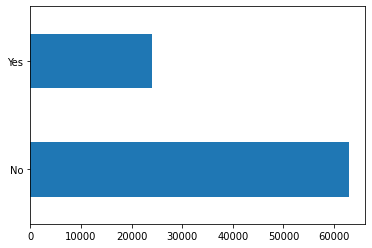

In [ ]:
#bookings cancelled.
print(hotel_df['cancelled'].value_counts())
hotel_df['cancelled'].value_counts().plot(kind='barh')

**Conclusion :** We can see that we have approximately 30% of the bookings cancellations and 70% are not being cancelled. It is a good sign but we should still take measures to control and reduce the amount of bookings cancelled.

8) What is the booking ratio of city hotels and resort hotels?

In [ ]:
#booking ratio
booking_ratio = hotels_not_cancelled['hotel'].value_counts().reset_index()
ratio = booking_ratio['hotel'][0]/booking_ratio['hotel'][1]
print(booking_ratio)
print(f'Our required ratio between city hotel and resort hotel is {ratio}. This means city hotel accounts for {ratio} times more bookings.')

          index  hotel
0    City Hotel  37377
1  Resort Hotel  25576
Our required ratio between city hotel and resort hotel is 1.461409133562715. This means city hotel accounts for 1.461409133562715 times more bookings.


**Conclusion :** Our required ratio between city hotel and resort hotel is 1.461409133562715. This means city hotel accounts for 1.461409133562715 times more bookings.

In [ ]:
# #arrivals per year
# hotels_not_cancelled['arrival_date_year'].value_counts().plot(kind='barh')
# percentage_by_year = hotels_not_cancelled['arrival_date_year'].value_counts().reset_index()
# percentage_by_year.sort_values(by = 'arrival_date_year', inplace = True)
# percentage_by_year

9) Top 5 countries

PRT    17662
GBR     8448
FRA     7104
ESP     5390
DEU     4334
       ...  
ZMB        1
FRO        1
KIR        1
BDI        1
DJI        1
Name: country, Length: 165, dtype: int64

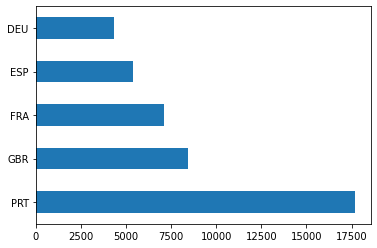

In [ ]:
#guests coming from top 5 countries
top_five_countries = hotels_not_cancelled['country'].value_counts()[:5].plot(kind='barh')
hotels_not_cancelled['country'].value_counts()

**Conclusion :** A very high proportion of travellers have their nationality as "PRT" that is 17662 after that we have GBR travellers that is 8442 and then comens FRA > ESP > DEU. We should mainly focus on the key aspects of lifestyles of these countries to make our travellers happy and increase repeating customers as most of our travellers are coming from the above countries only.

10) Are guests are travelling in a family or solo?

In [ ]:
#unique values of families
hotels_not_cancelled['adults'].unique()

array([2, 1, 3, 0, 4])

,index,adults
0,2,45697
1,1,13019
2,3,3903
3,0,288
4,4,46


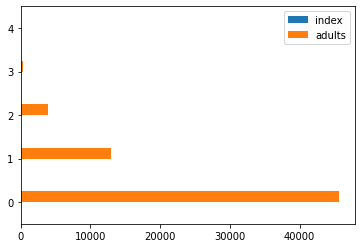

In [ ]:
#family status
family_status = hotels_not_cancelled['adults'].value_counts().reset_index()
family_status.plot(kind='barh')
family_status

**Conclusion :** Out of total travellers we have more than 70% of the travellers that are 45697 who are travelling and booking rooms on a dual occupency. These 2 adults can be assumed as friends,couple, brothers, sisters etc. After that around 20% of them are solo travellers who made single room bookings. They can either be on business trip or solo trip. Then after that we have more very few bookings with 0 adults or 3, 4 adults in a single room. As we can not see more than 4 adults it seems that hotels do not accomodate more than 4 adults in a single room.  

In [ ]:
# #Hotel cancellations and non cancellations month wise
# ax = hotel_df.groupby(['year_month'])['is_canceled'].value_counts().plot.barh(width=0.5,                                                                  # SETTING LINED EDGES TO CLEAR DETECRIONOF BARS
#     linewidth=1,                                                                # SETTING LINED EDGES TO CLEAR DETECRIONOF BARS
#     edgecolor='black',
#     figsize = (20,10),
#     fontsize = 10,
# )



In [ ]:
hotel_df['canceled'] = hotel_df['is_canceled'] == 1

11) Cancellation status per month per year?

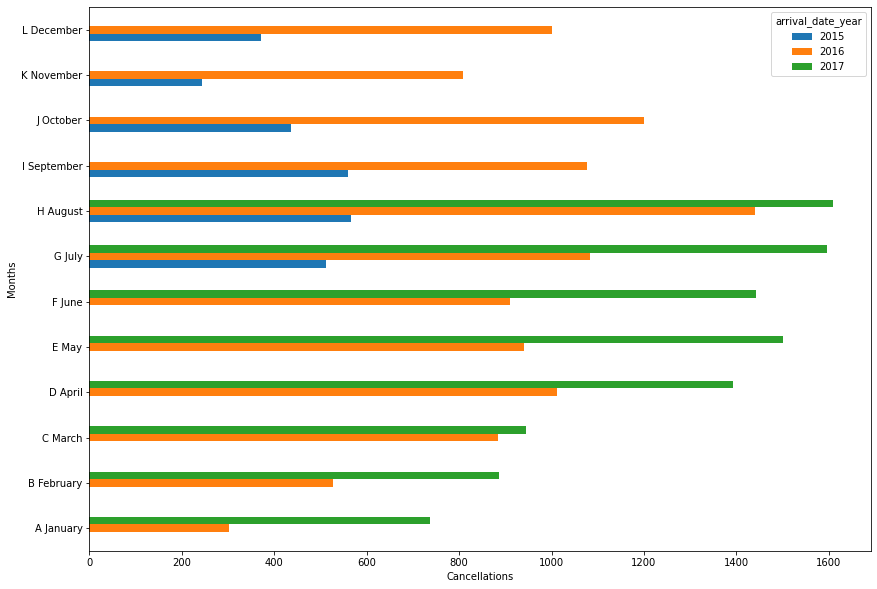

arrival_date_year,2015,2016,2017
arrival_date_month,,,
A January,NaN,301.0,736.0
B February,NaN,527.0,887.0
C March,NaN,885.0,944.0
D April,NaN,1012.0,1392.0
E May,NaN,941.0,1501.0
F June,NaN,910.0,1443.0
G July,512.0,1084.0,1596.0
H August,567.0,1441.0,1610.0
I September,560.0,1076.0,NaN


In [ ]:
#Calculating hotel cancellations year wise and month wise using pivot table and here we will take a count of non zeros that means the cancellations in hotel_df.
hotels_pivot = pd.pivot_table(
	hotel_df,
	values="is_canceled",
	index="arrival_date_month",
	columns="arrival_date_year",
	aggfunc=np.count_nonzero
)
ax = hotels_pivot.plot(kind="barh")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 10)
# Change the axes labels
ax.set_xlabel("Cancellations")
ax.set_ylabel("Months")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
hotels_pivot

**Conclusion :** From the above analysis we can see that we have data of some months missing in 2015 and 2017. In 2015 we have highest cancellations in august and second highest in september whereas November, December has the lowest cancellations. In 2016 our highest cancellations are in the month of august and second highest in October whereas the lowest cancellations are in the month of Jan and Feb respectively. In 2017 July and august reports high cancllations and we have Jan, Feb having lower cancellation rate respectively. There we can see that we have higher cancellation rates between the months of July to October and comparatively lower cancellation rates thereafter.

11) Cancellation and arrival status per month per year?

<bound method Series.reset_index of year_month        is_canceled
2015 G July       0              1149
                  1               512
2015 H August     0              1870
                  1               567
2015 I September  0              2259
                  1               560
2015 J October    0              2239
                  1               437
2015 K November   0              1402
                  1               243
2015 L December   0              1590
                  1               372
2016 A January    0              1515
                  1               301
2016 B February   0              2246
                  1               527
2016 C March      0              2911
                  1               885
2016 D April      0              2734
                  1              1012
2016 E May        0              2827
                  1               941
2016 F June       0              2595
                  1               910
2016 G July       0   

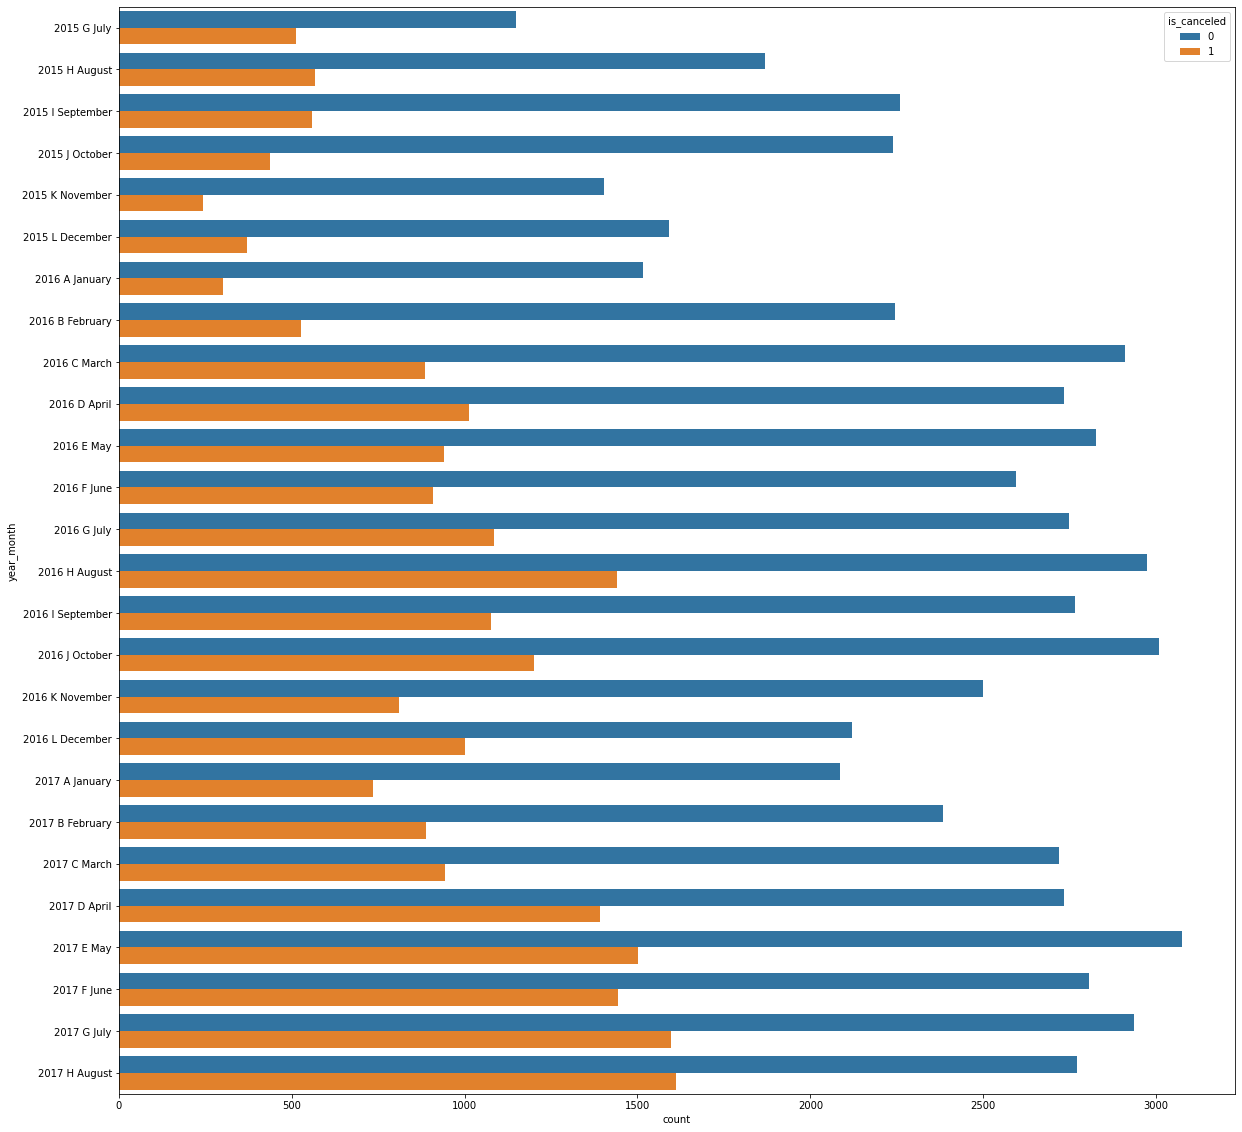

In [ ]:
#Import Seaborn library
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 20))
#Plot Cancellations and non cancellation year wise nad month wise to get a trend
sns.countplot(y="year_month", hue="is_canceled", data=hotel_df)
cancel_analysis = hotel_df.groupby('year_month')['is_canceled'].value_counts().reset_index
cancel_analysis

12) Comparison of waiting days per month per year for cancelled hotels and arrivals. **Arrivals doubt**



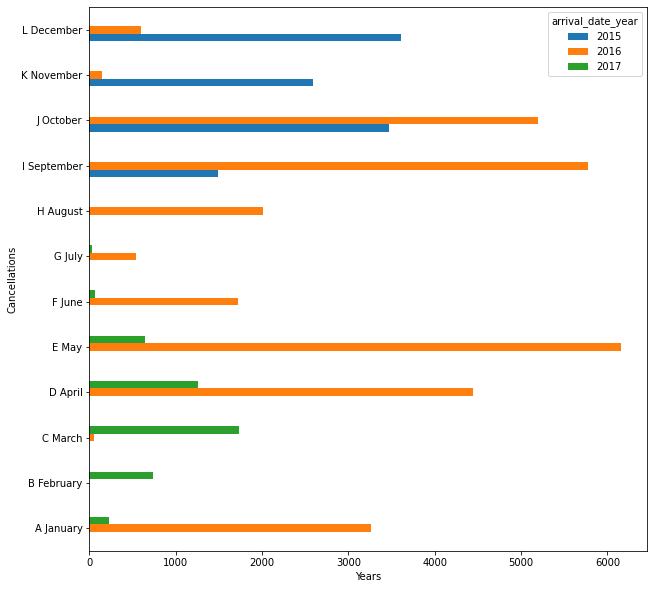

arrival_date_year,2015,2016,2017
arrival_date_month,,,
A January,NaN,3265.0,229.0
B February,NaN,0.0,738.0
C March,NaN,58.0,1737.0
D April,NaN,4442.0,1257.0
E May,NaN,6156.0,639.0
F June,NaN,1718.0,59.0
G July,0.0,534.0,34.0
H August,0.0,2009.0,0.0
I September,1489.0,5780.0,NaN


In [ ]:
#waiting days of every year per month for arrivals
hotels_pivot = pd.pivot_table(
	hotels_not_cancelled,
	values="days_in_waiting_list",
	index="arrival_date_month",
	columns="arrival_date_year",
	aggfunc=np.sum
)

ax = hotels_pivot.plot(kind="barh")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Cancellations")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
hotels_pivot

**Conclusion :** From our analysis in 2015 we have highest number of waiting days in the month of december and then in november. In 2016 we have highest number of waiting dats in may after that september and october are also having a decent number of high waiting which should be focused upon. It suddenly dropped in november to 217 and then rose to 711 in dec and then to 4012 in jan which was a very high increase rate. Then in Feb it suddenly falls to the lowest peak again. In 2016 it has been fluctuating alot. In 2017, month of april and march had a very high waiting list, whereas Jan and July recorded the lowest waiting list. Reasons will have to be figured out.



In [ ]:
# #Hotel cancellations and non cancellations month wise
# ax = hotel_df.groupby(['year_month'])['is_canceled'].value_counts().plot.barh(
#     width=0.5,                                                                  # SETTING LINED EDGES TO CLEAR DETECRIONOF BARS
#     linewidth=1,                                                                # SETTING LINED EDGES TO CLEAR DETECRIONOF BARS
#     edgecolor='black',
#     figsize = (30,15),
#     fontsize = 10,
# )

In [ ]:
# # cancel_anal = hotel_df.pivot_table(["rain(mm)","temp(dC)"], ["loc","month"])  
# # hotel_df = sns.load_dataset("Hotel Bookings.csv")
# import seaborn as sns
# f, ax = plt.subplots(figsize=(20, 20))
# sns.countplot(y="year_month", hue="is_canceled", data=hotel_df)
# cancel_analysis = hotel_df.groupby('year_month')['is_canceled'].value_counts().reset_index
# cancel_analysis

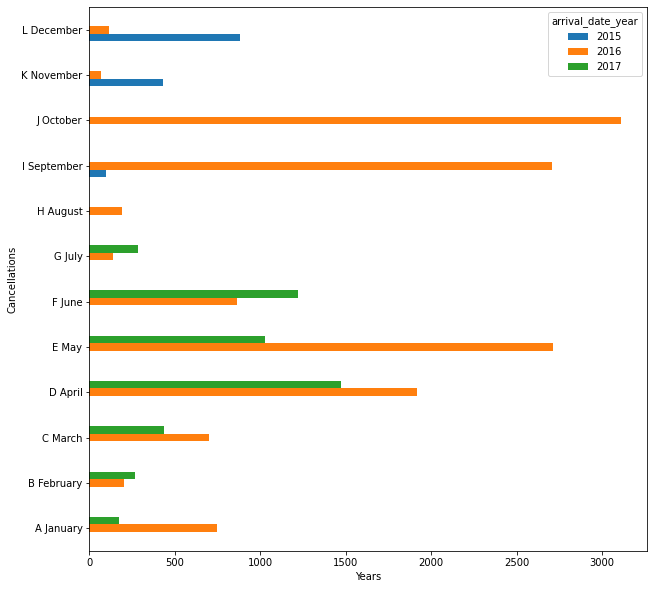

arrival_date_year,2015,2016,2017
arrival_date_month,,,
A January,NaN,747.0,172.0
B February,NaN,200.0,264.0
C March,NaN,701.0,438.0
D April,NaN,1915.0,1470.0
E May,NaN,2713.0,1028.0
F June,NaN,862.0,1219.0
G July,0.0,138.0,285.0
H August,0.0,188.0,0.0
I September,98.0,2707.0,NaN


In [ ]:
#waiting days of every year per month for cancellations
hotels_pivot = pd.pivot_table(
	hotels_cancelled,
	values="days_in_waiting_list",
	index="arrival_date_month",
	columns="arrival_date_year",
	aggfunc=np.sum
)

ax = hotels_pivot.plot(kind="barh")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Cancellations")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
hotels_pivot

In [ ]:
# cancel_analysis = hotel_df.groupby(['year_month'])['is_canceled'].value_counts()
# cancel_analysis.plot(kind = "line", figsize = (30,30))

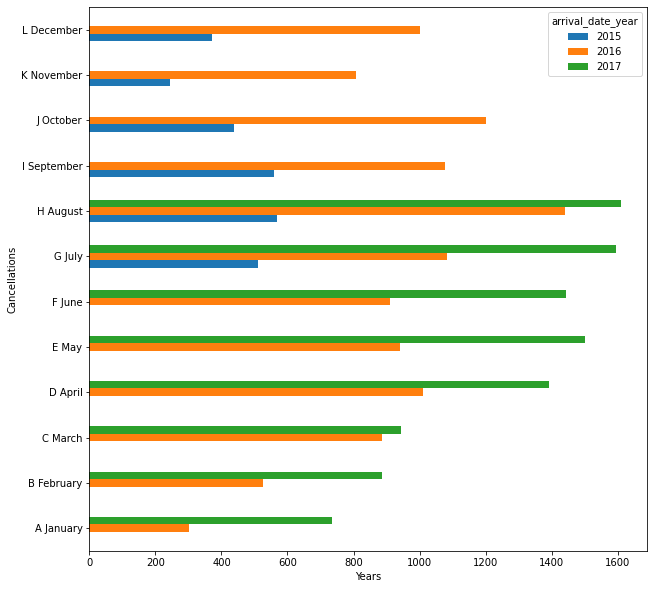

arrival_date_year,2015,2016,2017
arrival_date_month,,,
A January,NaN,301.0,736.0
B February,NaN,527.0,887.0
C March,NaN,885.0,944.0
D April,NaN,1012.0,1392.0
E May,NaN,941.0,1501.0
F June,NaN,910.0,1443.0
G July,512.0,1084.0,1596.0
H August,567.0,1441.0,1610.0
I September,560.0,1076.0,NaN


In [ ]:
#waiting days of every year per month for cancellations
hotels_pivot = pd.pivot_table(
	hotels_cancelled,
	values="is_canceled",
	index="arrival_date_month",
	columns="arrival_date_year",
	aggfunc= "count"
)

ax = hotels_pivot.plot(kind="barh")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Cancellations")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
hotels_pivot

###Conclusion: Cancelled hotels might have many factors but waiting is also one of them.